In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-colorblind')

C:\Users\davisoc\AppData\Local\Temp\ipykernel_22548\3031116794.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


In [107]:
df1 = pd.read_pickle("./time_data/time_data_1.pkl") 
df2 = pd.read_pickle("./time_data/time_data_2.pkl")
df3 = pd.read_pickle("./time_data/time_data_3.pkl")
df4 = pd.read_pickle("./time_data/time_data_4.pkl")
df = pd.concat([df1,df2,df3,df4],ignore_index=True)

In [108]:
df['OTUs'].value_counts()

100     100
1750    100
6500    100
6000    100
5500    100
5000    100
4500    100
3500    100
2500    100
1250    100
200     100
4000    100
3000    100
2000    100
1500    100
1000    100
800     100
400     100
7000    100
Name: OTUs, dtype: int64

In [109]:
df_even = df.loc[df["OTUs"].isin([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000])]

In [110]:
c = []
rows = df.shape[0]
for i in range(0,rows):
    if df["Our Time"][i] > df["ETE Time"][i]:
        # Our time is slower
        c.append("DarkBlue")
    else:
        # Our time is faster
        c.append("DarkGreen")

df["Color"] = c

In [111]:
df["Color"].value_counts()

DarkGreen    1151
DarkBlue      749
Name: Color, dtype: int64

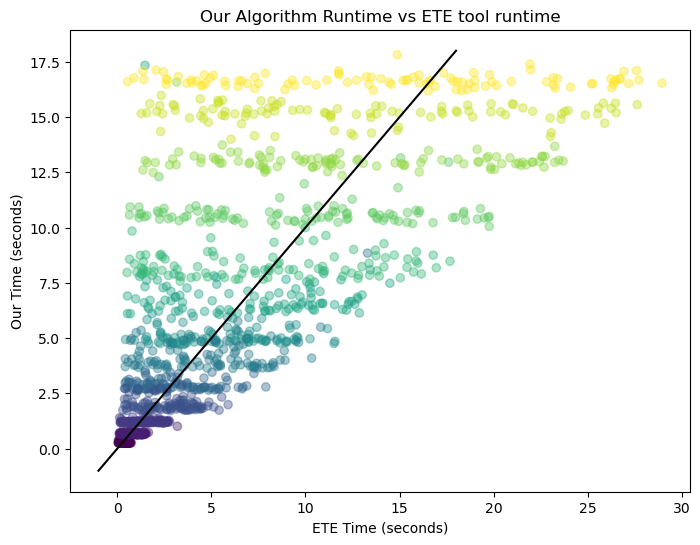

In [112]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(df_even["ETE Time"],df_even["Our Time"],c=df_even["OTUs"],alpha=0.4)
ax.plot([-1, 18], [-1, 18],c="Black")


ax.set_xlabel('ETE Time (seconds)')
ax.set_ylabel('Our Time (seconds)')
ax.set_title('Our Algorithm Runtime vs ETE tool runtime')

plt.show()
fig = ax.get_figure()
# fig.savefig('./figures/dict_runtime_compare.png')

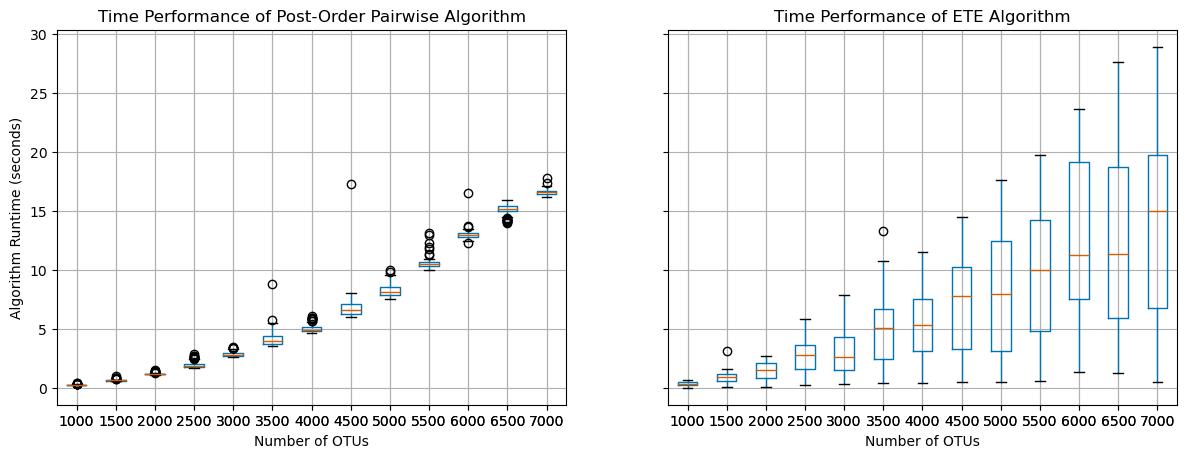

In [149]:

ax = df_even.boxplot(column=['Our Time','ETE Time'], by='OTUs',figsize=(14,5))
plt.suptitle("")
ax[0].set_ylabel("Algorithm Runtime (seconds)")
ax[0].set_xlabel("Number of OTUs")
ax[0].set_title("Time Performance of Post-Order Pairwise Algorithm")
ax[1].set_title("Time Performance of ETE Algorithm")
ax[1].set_xlabel("Number of OTUs")
plt.savefig('./figures/dict_boxplot_runtime.png')

In [114]:
cc_df = pd.read_pickle("./time_data/compact_compare_3.pkl")
cc_df2 = pd.read_pickle("./time_data/compact_compare_4.pkl")
cc_df3 = pd.read_pickle("./time_data/compact_compare_7.pkl")
cc_df3

,Our Time,Height,Diameter,CTI,SI,B1,OTUs,Sleep Function Time
0,0.000000,4,5,0.500000,2.60,2.500000,5,0.002038
1,0.000000,4,5,0.500000,2.60,2.500000,5,0.002041
2,0.000000,4,5,0.500000,2.60,2.500000,5,0.001992
3,0.000000,4,5,0.500000,2.60,2.500000,5,0.002010
4,0.000000,4,5,0.500000,2.60,2.500000,5,0.001999
...,...,...,...,...,...,...,...,...
3995,0.002037,15,26,0.063904,8.08,52.335292,100,0.002043
3996,0.000000,15,26,0.063904,8.08,52.335292,100,0.002100
3997,0.001029,15,26,0.063904,8.08,52.335292,100,0.001475
3998,0.003519,15,26,0.063904,8.08,52.335292,100,0.002031


KeyError: 'Column not found: ETE Time'

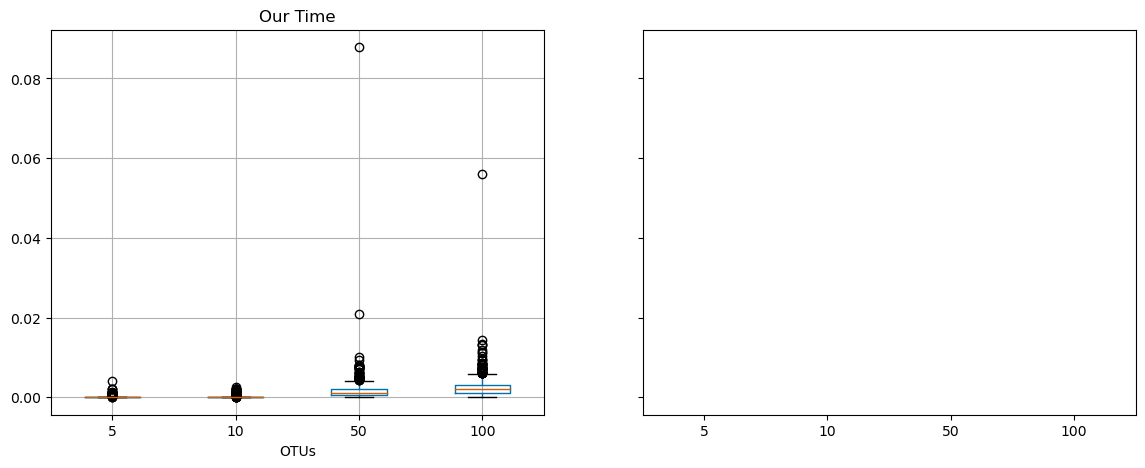

In [150]:
ax = cc_df3.boxplot(column=['Our Time','ETE Time'], by='OTUs',figsize=(14,5))
plt.suptitle("")
ax[0].set_ylabel("Algorithm Runtime (seconds)")
ax[0].set_xlabel("Number of OTUs")
ax[0].set_title("Time Performance of Post-Order Pairwise Algorithm")
ax[1].set_title("Time Performance of ETE Algorithm")
ax[1].set_xlabel("Number of OTUs")
# plt.savefig('./figures/dict_boxplot_runtime.png')

In [115]:
cc_df4 = cc_df3.loc[cc_df3["OTUs"] == 5]
cc_df4["Our Time"].max()

0.003984689712524414

<Axes: >

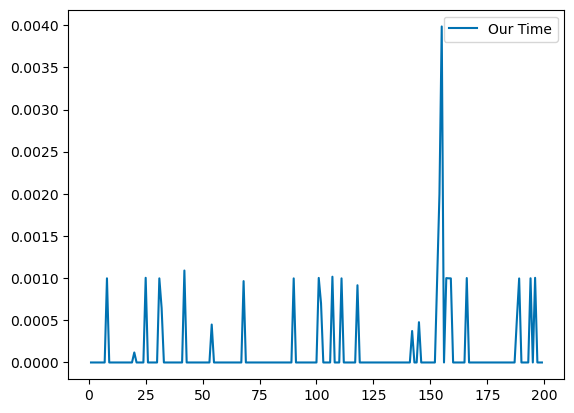

In [116]:
cc_df4[1:200].plot(use_index=True,y="Our Time")

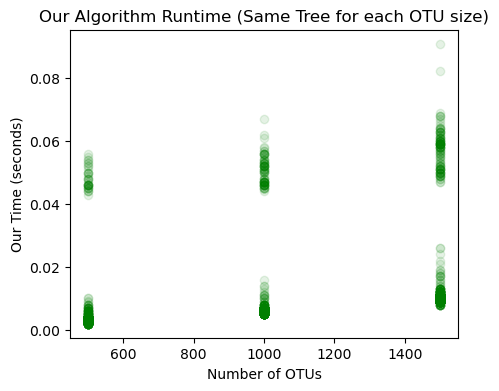

In [117]:
fig = plt.figure(figsize=(5, 4))
ax = plt.axes()
# s = ax.scatter(cc_df4["OTUs"],cc_df4["Sleep Function Time"],c="Purple",alpha=0.1)
s1 = ax.scatter(cc_df["OTUs"],cc_df["Our Time"],c="Green",alpha=0.1)

ax.set_xlabel('Number of OTUs')
ax.set_ylabel('Our Time (seconds)')
ax.set_title('Our Algorithm Runtime (Same Tree for each OTU size)')

plt.show()

# fig.savefig('./figures/compact_runtime_same.png')

<Axes: title={'center': 'Our Time'}, xlabel='OTUs'>

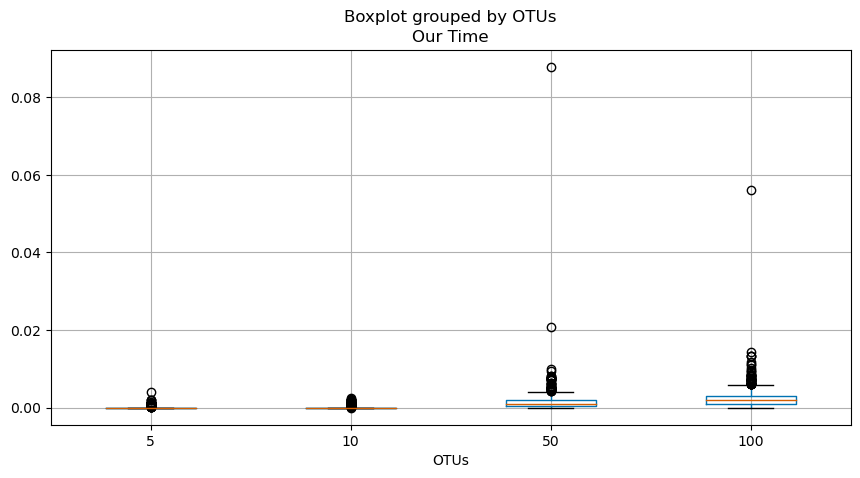

In [118]:
cc_df3.boxplot(column=['Our Time'], by='OTUs',figsize=(10,5))

In [119]:
compdf = pd.read_pickle("./time_data/compact_compare_2.pkl")
compdf

,Our Time,ETE Time,Height,Diameter,CTI,SI,B1,OTUs
0,0.000000,0.013963,13,23,0.062255,8.0800,53.017893,100
1,0.023981,0.008939,12,22,0.049680,7.6500,53.460317,100
2,0.000999,0.004944,18,24,0.096063,9.1800,53.658110,100
3,0.000964,0.007976,14,25,0.067203,8.1400,53.725036,100
4,0.000954,0.008968,14,24,0.058338,7.8500,52.632179,100
...,...,...,...,...,...,...,...,...
9995,0.014960,0.558541,24,44,0.006723,14.5485,1079.494965,2000
9996,0.013011,0.175292,25,44,0.006820,14.9275,1076.359678,2000
9997,0.013915,1.200132,25,47,0.005597,13.5275,1070.639720,2000
9998,0.012964,1.994062,25,47,0.006667,14.4340,1069.133331,2000


In [120]:
compdf3 = compdf.loc[(compdf['ETE Time'] >= 0) & (compdf["OTUs"] % 200 == 0)]
compdf3

,Our Time,ETE Time,Height,Diameter,CTI,SI,B1,OTUs
500,0.001000,0.027928,16,30,0.037663,9.5200,104.959943,200
501,0.001000,0.012004,16,25,0.035582,9.3850,112.334102,200
502,0.025933,0.016993,15,26,0.033958,9.0050,110.557154,200
503,0.001034,0.030908,15,28,0.034871,9.3050,107.657551,200
504,0.001042,0.017948,16,28,0.048322,10.1300,104.909535,200
...,...,...,...,...,...,...,...,...
9995,0.014960,0.558541,24,44,0.006723,14.5485,1079.494965,2000
9996,0.013011,0.175292,25,44,0.006820,14.9275,1076.359678,2000
9997,0.013915,1.200132,25,47,0.005597,13.5275,1070.639720,2000
9998,0.012964,1.994062,25,47,0.006667,14.4340,1069.133331,2000


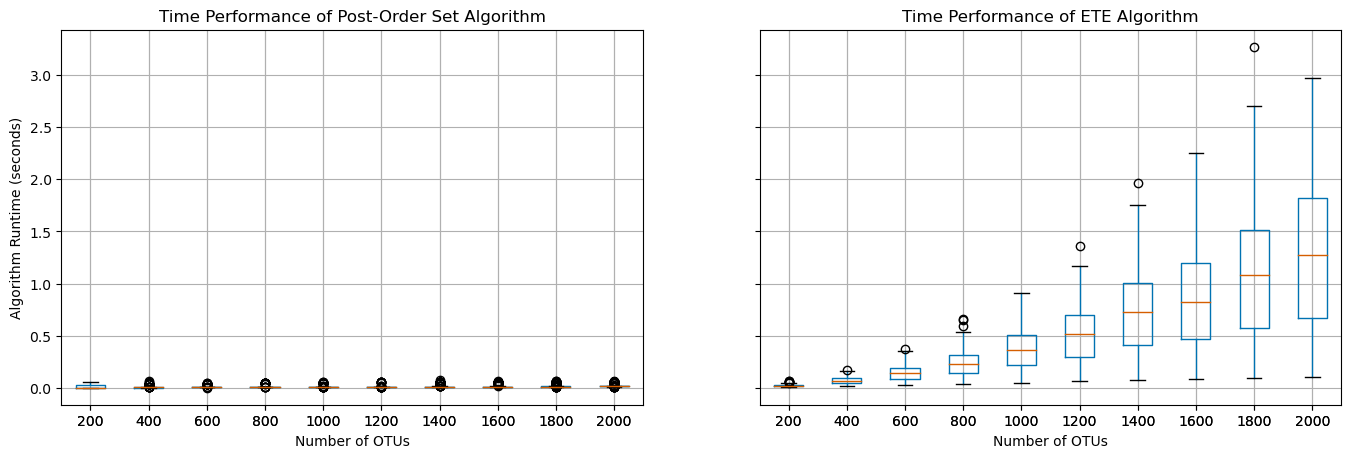

In [153]:
ax = compdf3.boxplot(column=['Our Time','ETE Time'], by='OTUs',figsize=(16,5))
plt.suptitle("")
ax[0].set_ylabel("Algorithm Runtime (seconds)")
ax[0].set_xlabel("Number of OTUs")
ax[0].set_title("Time Performance of Post-Order Set Algorithm")
ax[1].set_title("Time Performance of ETE Algorithm")
ax[1].set_xlabel("Number of OTUs")
# plt.savefig('./figures/dict_boxplot_runtime.png')
# plt.savefig('./figures/compact_boxplot_runtime.png')

KeyError: 'ETE Time'

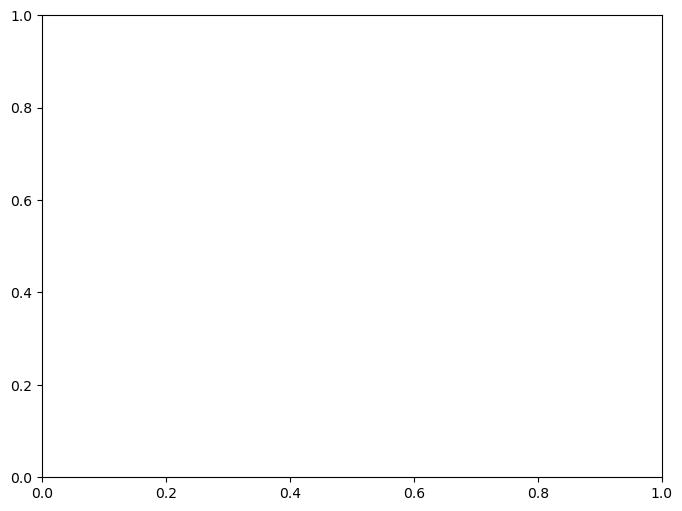

In [122]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(cc_df["ETE Time"],cc_df["Our Time"],c=cc_df["OTUs"],alpha=0.4)
ax.plot([0, 1], [0, 1],c="Black")


ax.set_xlabel('ETE Time (seconds)')
ax.set_ylabel('Our Time (seconds)')
ax.set_title('Our Algorithm Runtime vs ETE tool runtime')

plt.show()
fig = ax.get_figure()

In [ ]:
df = pd.read_pickle("./time_data/compact_compare_2.pkl")
df

,Our Time,ETE Time,Height,Diameter,CTI,SI,B1,OTUs
0,0.000000,0.013963,13,23,0.062255,8.0800,53.017893,100
1,0.023981,0.008939,12,22,0.049680,7.6500,53.460317,100
2,0.000999,0.004944,18,24,0.096063,9.1800,53.658110,100
3,0.000964,0.007976,14,25,0.067203,8.1400,53.725036,100
4,0.000954,0.008968,14,24,0.058338,7.8500,52.632179,100
...,...,...,...,...,...,...,...,...
9995,0.014960,0.558541,24,44,0.006723,14.5485,1079.494965,2000
9996,0.013011,0.175292,25,44,0.006820,14.9275,1076.359678,2000
9997,0.013915,1.200132,25,47,0.005597,13.5275,1070.639720,2000
9998,0.012964,1.994062,25,47,0.006667,14.4340,1069.133331,2000


In [ ]:
gp = df.groupby(by=["OTUs"])
ourdf = gp.median()["Our Time"]
ourdf

OTUs
100     0.000953
200     0.001035
300     0.001987
400     0.002944
500     0.003028
600     0.004013
700     0.004986
800     0.005028
900     0.006019
1000    0.006979
1100    0.007969
1200    0.007980
1300    0.008975
1400    0.009975
1500    0.010010
1600    0.010970
1700    0.011957
1800    0.012016
1900    0.012966
2000    0.013155
Name: Our Time, dtype: float64

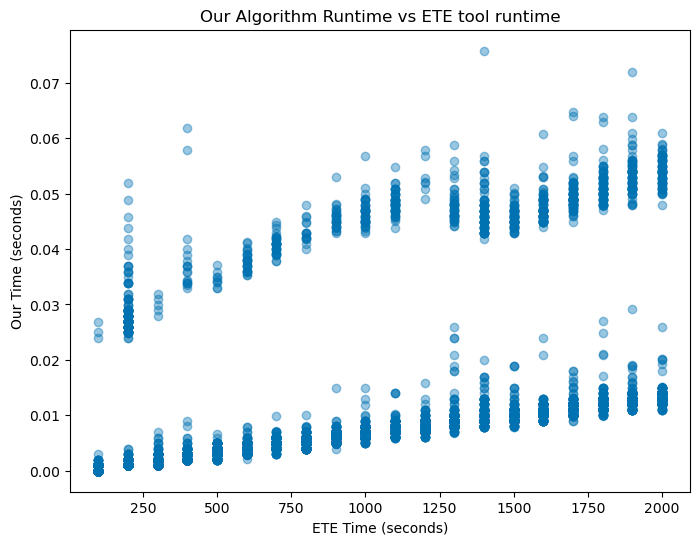

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(df["OTUs"],df["Our Time"],alpha=0.4)

ax.set_xlabel('ETE Time (seconds)')
ax.set_ylabel('Our Time (seconds)')
ax.set_title('Our Algorithm Runtime vs ETE tool runtime')

plt.show()
fig = ax.get_figure()

In [ ]:
df1 = pd.read_pickle("./time_data/final_time_data_2.pkl")
df2 = pd.read_pickle("./time_data/final_time_data_3.pkl")
df = pd.concat([df1,df2],ignore_index=True)
df = df.loc[df["Number of OTUs"] <= 1500]

In [ ]:
gp = df.groupby(by = "Number of OTUs")
med = gp.median()
med

,Our Time
Number of OTUs,
100,0.000954
200,0.000999
300,0.002016
400,0.002037
500,0.003989
600,0.004953
700,0.004992
800,0.005992
900,0.006981


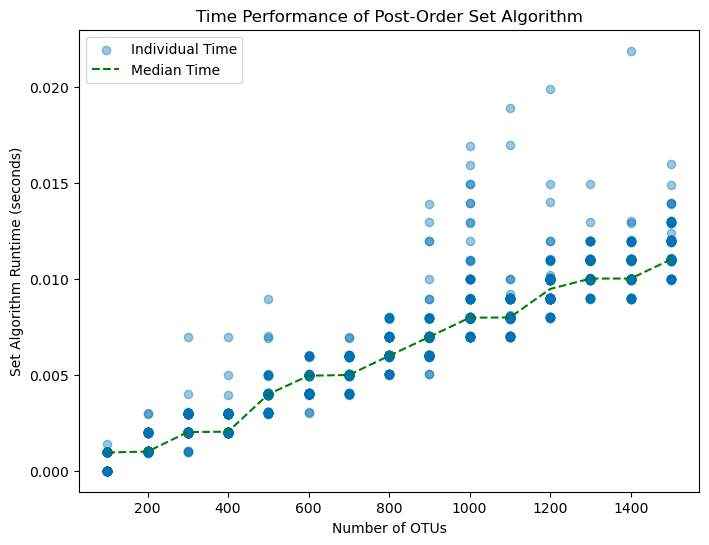

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(df["Number of OTUs"],df["Our Time"],alpha=0.4, label = "Individual Time")

plt.plot(med, linestyle='--',color='green', label='Median Time')

plt.legend()

ax.set_xlabel('Number of OTUs')
ax.set_ylabel('Set Algorithm Runtime (seconds)')
ax.set_title('Time Performance of Post-Order Set Algorithm')

plt.show()
fig = ax.get_figure()

fig.savefig('./figures/post_order_set_runtime.png')